# Process selected labeled data and create DFs

In [1]:
import os

import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format='retina'

import math
from collections import defaultdict
from textwrap import wrap
import numpy as np

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

import nltk.data
from nltk.tokenize import sent_tokenize
from nltk.corpus import alpino

In [2]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
DATA_DIR = "~/dev/hist-aware/notebooks/data/labeled"
PRE_TRAINED_MODEL_NAME = 'wietsedv/bert-base-dutch-cased'

## Load csv

In [36]:
list_cols = ['sentiment', 'text', 'energy', 'article_filepath', 'article_name', 'count', 'date', 'dir', 'index_article', 'index_metadata', 'metadata_filepath',
                    'newspaper_publisher', 'newspaper_title', 'newspaper_volume', 
             'newspaper_issuenumber', 'text_clean', 'type']
list_cols_1960 = ['sentiment', 'text', 'energy', 'article_filepath', 'article_name', 'count', 'date', 'dir_x', 'index_article', 'index_metadata', 'metadata_filepath',
                    'newspaper_publisher', 'newspaper_title', 'newspaper_volume', 
             'newspaper_issuenumber', 'text_clean', 'subject']

In [37]:
def clean_individual_df(df):
    """Function to clean df after concat"""
    df.text.replace('', np.nan, inplace=True)
    df.dropna(subset=['text'], inplace=True)
    df.rename(columns = {"sentiment": "labels"}, inplace=True)
    df.labels.replace('', np.nan, inplace=True)
    df.dropna(subset=['labels'], inplace=True)

    df = df[df.energy == "Y"]
    df = df[df.labels != None]
    
    # Substitute categorical to numerical labels
    cleanup_sentiment = {"labels": {"VN": 1, "NG": 2, "NE": 3, "PO": 4, "VP": 5}}
    df = df.replace(cleanup_sentiment)
    
    # Squeeze from 5 to 3 labels
    def to_sentiment(rating):
        rating = int(rating)
        if rating <= 2:
            return 0  # NEGATIVE
        elif rating == 3: 
            return 1 # NEUTRAL
        else:
            return 2 # POSITIVE

    df['labels'] = df.labels.apply(to_sentiment)
    return df

def clean_df(df):
    """Function to clean df after concat"""
    df.text.replace('', np.nan, inplace=True)
    df.dropna(subset=['text'], inplace=True)
    df.labels.replace('', np.nan, inplace=True)
    df.dropna(subset=['labels'], inplace=True)
    return df

### Gas

In [41]:
gas_1960 = pd.read_csv(os.path.join(DATA_DIR, "marin_1960s_gas.csv"))
gas_1970 = pd.read_csv(os.path.join(DATA_DIR, "edo_1970s_gas.csv"))
gas_1980 = pd.read_csv(os.path.join(DATA_DIR, "edo_1980s_gas.csv"))
gas_1990 = pd.read_csv(os.path.join(DATA_DIR, "edo_1990s_gas.csv"))

gas_1960 = gas_1960[list_cols_1960]
gas_1960.rename(columns = {"dir_x": "dir", "subject": "type"}, inplace = True)
gas_1970 = gas_1970[list_cols]
gas_1970 = clean_individual_df(gas_1970)
gas_1980 = gas_1980[list_cols]
gas_1980 = clean_individual_df(gas_1980)
gas_1990 = gas_1990[list_cols]
gas_1990 = clean_individual_df(gas_1990)

# Save back to csv cleaned
gas_1970.to_csv(os.path.join(DATA_DIR, "edo_1970s_gas_cleaned.csv"))
gas_1980.to_csv(os.path.join(DATA_DIR, "edo_1980s_gas_cleaned.csv"))
gas_1990.to_csv(os.path.join(DATA_DIR, "edo_1990s_gas_cleaned.csv"))

gas = gas_1960.append(gas_1970, ignore_index=True)
gas = gas.append(gas_1980, ignore_index=True)
gas = gas.append(gas_1990, ignore_index=True)
gas = gas[gas.energy == "Y"]
gas = gas[gas.labels != None]
gas = clean_df(gas)

In [25]:
#Check
#gas_1980.head(1)
gas_1990.head(1)

,labels,text,energy,article_filepath,article_name,count,date,dir,index_article,index_metadata,metadata_filepath,newspaper_language,newspaper_publisher,newspaper_source,newspaper_title,newspaper_volume,newspaper_issuenumber,newspaper_city,text_clean,type
0,2,Dit jaar is het precies 200 jaar geleden dat v...,Y,/Users/leonardovida/dev/HistAware/data/raw/del...,DDD_010559878_0088_articletext.xml,11,1992-01-27,/Users/leonardovida/dev/HistAware/data/raw/del...,1699050,4340.0,/Users/leonardovida/dev/HistAware/data/raw/del...,nl,Stichting Nederlands Dagblad,Nederlands Dagblad,Nederlands dagblad : gereformeerd gezinsblad /...,48.0,11999.0,Amersfoort,dit jaar is het precies jaar geleden dat voor ...,p


### Oil

In [44]:
oil_1960 = pd.read_csv(os.path.join(DATA_DIR, "marin_1960s_oil.csv"))
oil_1970 = pd.read_csv(os.path.join(DATA_DIR, "edo_1970s_oil.csv"))
oil_1980 = pd.read_csv(os.path.join(DATA_DIR, "edo_1980s_oil.csv"))
oil_1990 = pd.read_csv(os.path.join(DATA_DIR, "edo_1990s_oil.csv"))

oil_1960 = oil_1960[list_cols_1960]
oil_1960.rename(columns = {"dir_x": "dir", "subject": "type"}, inplace = True)
oil_1970 = oil_1970[list_cols]
oil_1970 = clean_individual_df(oil_1970)
oil_1980 = oil_1980[list_cols]
oil_1980 = clean_individual_df(oil_1980)
oil_1990 = oil_1990[list_cols]
oil_1990 = clean_individual_df(oil_1990)

# Save back to csv cleaned
oil_1970.to_csv(os.path.join(DATA_DIR, "edo_1970s_oil_cleaned.csv"))
oil_1980.to_csv(os.path.join(DATA_DIR, "edo_1980s_oil_cleaned.csv"))
oil_1990.to_csv(os.path.join(DATA_DIR, "edo_1990s_oil_cleaned.csv"))

oil = oil_1960.append(oil_1970, ignore_index=True)
oil = oil.append(oil_1980, ignore_index=True)
oil = oil.append(oil_1990, ignore_index=True)
oil = oil[oil.energy == "Y"]
oil = oil[oil.labels != None]
oil = clean_df(oil)

### Coal

In [45]:
coal_1960 = pd.read_csv(os.path.join(DATA_DIR, "marin_1960s_coal.csv"))
coal_1970 = pd.read_csv(os.path.join(DATA_DIR, "edo_1970s_coal.csv"))
coal_1980 = pd.read_csv(os.path.join(DATA_DIR, "edo_1980s_coal.csv"))
coal_1990 = pd.read_csv(os.path.join(DATA_DIR, "edo_1990s_coal.csv"))
coal_1990.drop(["sentiment_gas", "sentiment_oil"], axis=1, inplace=True)
coal_1990.rename(columns = {"sentiment": "accuracy_selection", "sentiment_coal": "sentiment"}, inplace=True)

coal_1960 = coal_1960[list_cols_1960]
coal_1960.rename(columns = {"dir_x": "dir", "subject": "type"}, inplace = True)
coal_1970 = coal_1970[list_cols]
coal_1970 = clean_individual_df(coal_1970)
coal_1980 = coal_1980[list_cols]
coal_1980 = clean_individual_df(coal_1980)
coal_1990 = coal_1990[list_cols]
coal_1990 = clean_individual_df(coal_1990)

# Save back to csv cleaned
coal_1970.to_csv(os.path.join(DATA_DIR, "edo_1970s_coal_cleaned.csv"))
coal_1980.to_csv(os.path.join(DATA_DIR, "edo_1980s_coal_cleaned.csv"))
coal_1990.to_csv(os.path.join(DATA_DIR, "edo_1990s_coal_cleaned.csv"))

coal = coal_1960.append(coal_1970, ignore_index=True)
coal = coal.append(coal_1980, ignore_index=True)
coal = coal.append(coal_1990, ignore_index=True)
coal = coal[coal.energy == "Y"]
coal = coal[coal.labels != None]
coal = clean_df(coal)

### General df

In [46]:
df = pd.concat([gas, oil, coal], ignore_index=True)
df = clean_df(df)
df.shape

(5007, 17)

## Fix labels

In [47]:
cleanup_sentiment = {"labels": {"VN": 1, "NG": 2, "NE": 3, "PO": 4, "VP": 5}}
oil = oil.replace(cleanup_sentiment)
gas = gas.replace(cleanup_sentiment)
coal = coal.replace(cleanup_sentiment)
df = df.replace(cleanup_sentiment)

In [48]:
#ax = sns.countplot(df.sentiment)
#plt.xlabel('review sentiment')

Reduce from 5 labels to 3 because of lack of labels

In [49]:
def to_sentiment(rating):
    rating = int(rating)
    if rating <= 2:
        return 0 # negative
    elif rating == 3:
        return 1 # neutral
    else:
        return 2 # Positive

df['labels'] = df.labels.apply(to_sentiment)
gas['labels'] = gas.labels.apply(to_sentiment)
coal['labels'] = coal.labels.apply(to_sentiment)
oil['labels'] = oil.labels.apply(to_sentiment)

Text(0.5, 0, 'review sentiment')

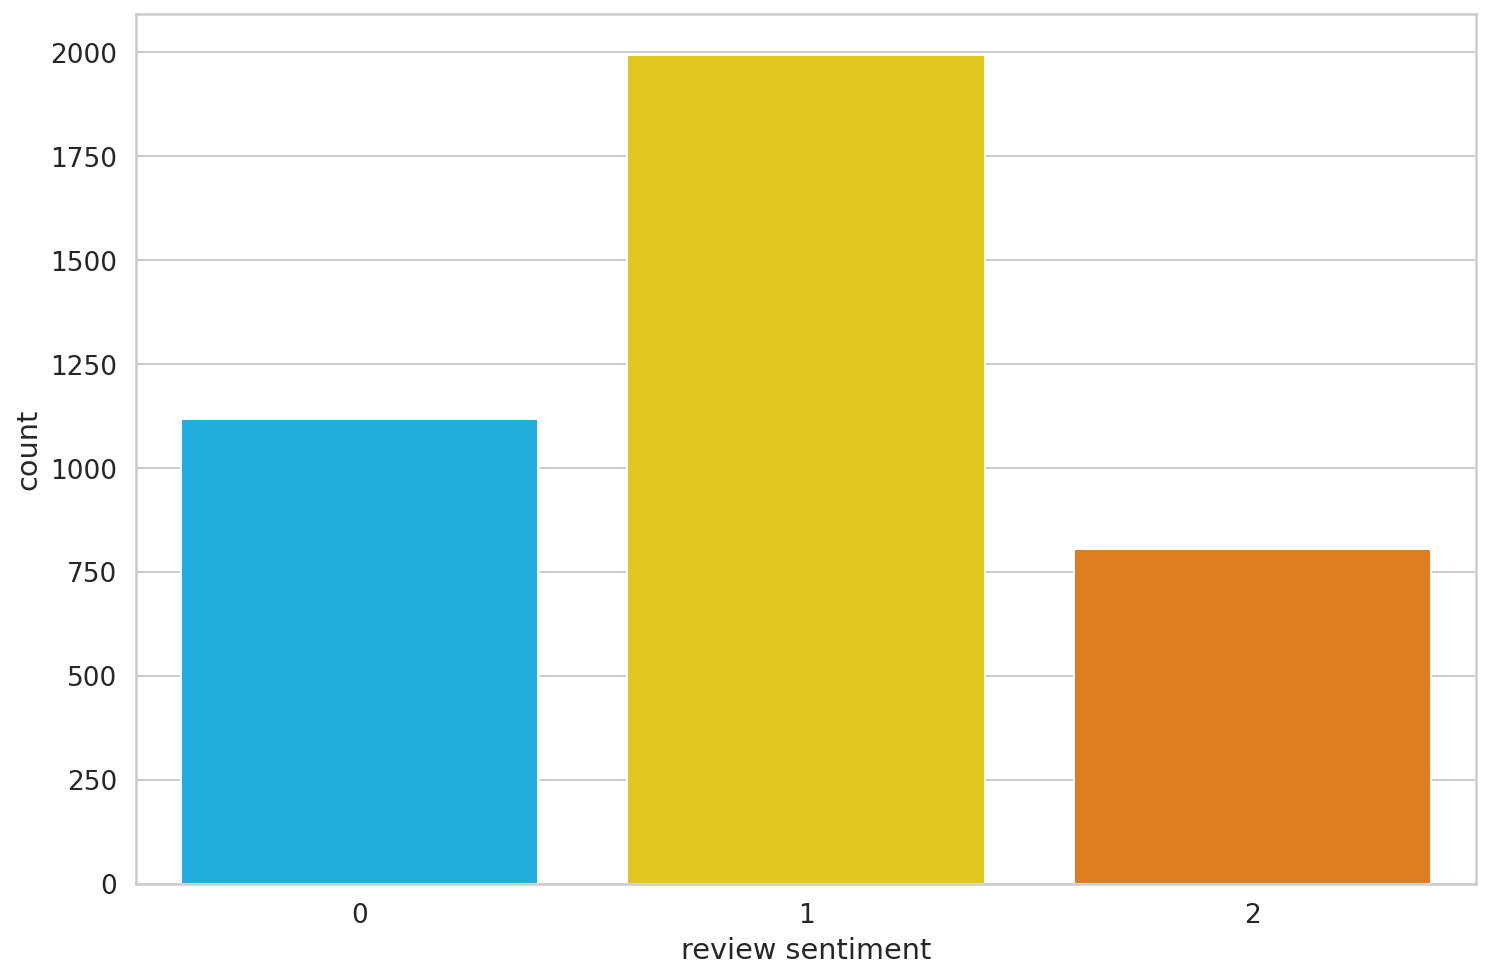

In [50]:
ax = sns.countplot(df.labels)
plt.xlabel('review sentiment')

### Split text and explode

In [52]:
def unite(l, n):
    """Unite sentences previously split using nltk.tokenize."""
    count = []
    chunks = []
    sents = []
    for s in l:
        count.append(len(s.split()))
    value = 0
    prev_idx = 0
    for i in range(0, len(count)):
        if value == 0:
            value = value + count[i]
        elif (i+1 == len(count)):
            chunks.append(l[prev_idx:i])
            value = 0
        elif value >= n:
            chunks.append(l[prev_idx:i])
            prev_idx = i
            value = 0
        else:
             value = value + count[i]
    for c in chunks:
        sents.append(' '.join(c))
    return(sents)

In [53]:
def splitter(s, n):
    """Split sentences only using the number of words."""
    pieces = s.split()
    return [" ".join(pieces[i:i+n]) for i in range(0, len(pieces), n)]

In [54]:
LEN_SENTS = 500
def apply_split_text(df):
    df["text_split"] = df["text"].apply(sent_tokenize)
    df["text_split"] = df["text_split"].apply(unite, n = LEN_SENTS)
    df["text_split_max_len"] = df["text"].apply(splitter, n = 500)
    df.text_split.replace([], np.nan, inplace=True)
    df.dropna(subset=['text_split'], inplace=True)
    # Cancel all text_split == 0
    df.drop(df[df.text_split.map(len) == 0].index, inplace=True)
    # Currently not splitting the cleaned sentences
    return df

In [55]:
oil = apply_split_text(oil)
gas = apply_split_text(gas)
coal = apply_split_text(coal)
df = apply_split_text(df)

Explode the sentences that we created previously

In [69]:
df = df.explode('text_split')
gas = gas.explode('text_split')
coal = coal.explode('text_split')
oil = oil.explode('text_split')

In [71]:
df.to_csv(os.path.join(DATA_DIR, "labeled_energy_1960_1990.csv"))
gas.to_csv(os.path.join(DATA_DIR, "labeled_gas_1960_1990.csv"))
coal.to_csv(os.path.join(DATA_DIR, "labeled_coal_1960_1990.csv"))
oil.to_csv(os.path.join(DATA_DIR, "labeled_oil_1960_1990.csv"))

---